In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
filter1 = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    
])

In [3]:
filter2 = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    
])

In [4]:
filter3 = np.array([
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,1,1,1,0],
    [0,1,1,1,0],
    [0,0,0,0,0],
    
])

In [5]:
filter4 = np.array([
    [0,0,0,0,0],
    [0, 0.5, 0.5, 0.5,0],
    [0, 0.5, 0.5, 0.5,0],
    [0, 0.5, 0.5, 0.5,0],
    [0,0,0,0,0],
    
])

In [6]:
def convolution(image, filter):
    
    result = np.zeros((image.shape[0]-4, image.shape[1]-4), dtype=np.uint8)
    
    for i in range(2, image.shape[0]-2):
        for j in range(2, image.shape[1]-2):

            sum = 0

            for fi in range(-2, 3):
                for fj in range(-2, 3):
                    sum += image[i + fi, j + fj] * filter[fi + 2, fj + 2]

            if sum < 0:
                sum = 0
            elif sum > 255:
                sum = 255


            result[i-2, j-2] = sum

    return result    
            
    

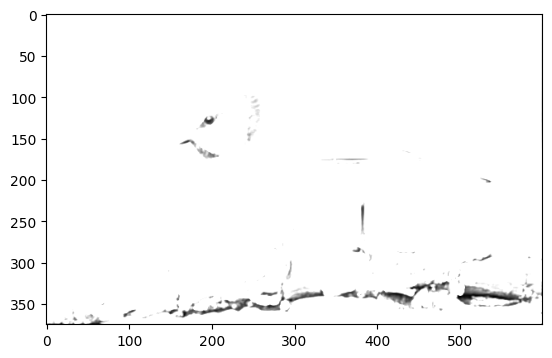

In [7]:
image = cv2.imread("grayscale.png", cv2.IMREAD_GRAYSCALE)
top = bottom = left = right = 2
padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
result_image = convolution(padded_image, filter4)
plt.imshow(result_image, cmap='gray')

#cv2.imshow("result.png", result_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()